In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('# Training data points: %d' % X_train.shape[0])
print('# Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Training data points: 80
# Testing data points: 20
Class labels: [-1  1]


Batch size: 1, Accuracy: 0.85
Batch size: 10, Accuracy: 0.85
Batch size: 20, Accuracy: 0.85


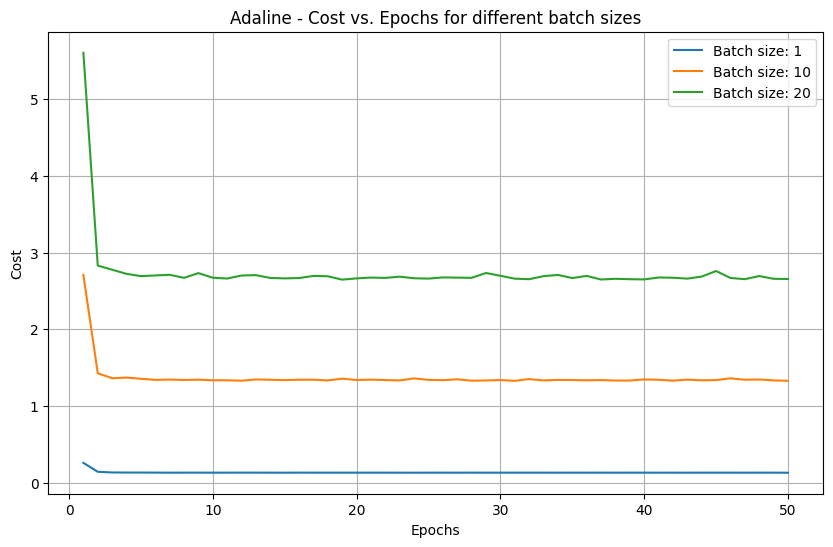

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
# Adaline Classifier
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1, batch_size=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.batch_size = batch_size

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1)
        self.cost_ = []

        for _ in range(self.n_iter):
            cost = []
            indices = np.random.permutation(len(y))
            X_shuffled, y_shuffled = X[indices], y[indices]

            for i in range(0, len(y), self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                output = self.net_input(X_batch)
                errors = y_batch - output
                self.w_[1:] += self.eta * X_batch.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
                cost.append((errors ** 2).sum() / 2.0)
            avg_cost = sum(cost) / len(cost)
            self.cost_.append(avg_cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Function to evaluate and plot the cost
def evaluate_adaline(batch_sizes, eta=0.01, n_iter=50):
    plt.figure(figsize=(10, 6))

    for M in batch_sizes:
        adaline = AdalineSGD(eta=eta, n_iter=n_iter, batch_size=M)
        adaline.fit(X_train_std, y_train)

        # Calculate accuracy
        y_pred = adaline.predict(X_test_std)
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        print(f'Batch size: {M}, Accuracy: {accuracy:.2f}')

        # Plot cost over epochs
        plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, label=f'Batch size: {M}')

    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.title('Adaline - Cost vs. Epochs for different batch sizes')
    plt.grid(True)
    plt.show()

# Testing the model with different batch sizes
batch_sizes = [1, 10, 20]
evaluate_adaline(batch_sizes)

# Save the plot
plt.savefig('Lab04-1_113062624.png')